## Business Understanding
The Chicago Department of Transportation (CDOT) wants to improve the safety of the city's roads and reduce the severity of injuries and fatalities resulting from car crashes. To do so, they need to identify the most important factors that contribute to the severity of injuries and fatalities. By analyzing data from past car crashes, they aim to uncover patterns and trends in the data that can help them make data-driven decisions and recommendations to improve road safety. The ultimate goal is to develop targeted interventions that can reduce the number and severity of car crashes in the city.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# scipy stats for probabilistic distributions and statistical operations
from scipy import stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import probplot


from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# re for regular expressions support
import re
# os for interactions with operating system
import os

In [2]:
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
filename = "Traffic_Crashes_-_Crashes.csv"
crashes_df = pd.read_csv(filename, index_col=0, low_memory=False)
crashes_df

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
CRASH_RECORD_ID,,,,,,,,,,,,,,,,,,,,,
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,JC199149,NaN,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
792b539deaaad65ee5b4a9691d927a34d298eb33d42af0a7959be4395099da62f4b24dcbfb96dd89e807d30d8bc0ccabe84823aa31a2530406777899d3971f63,JB422857,NaN,09/05/2018 08:40:00 AM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,8.0,4.0,9.0,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
0115ade9a755e835255508463f7e9c4a9a0b47e930423859bea2b3c984a0a470949256e11226bab0f3a45397310cac3a6ba52ee3bffeed1919a56a00c98bbf9a,JF318029,NaN,07/15/2022 12:45:00 AM,30.0,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,0.0,6.0,7.0,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d28165b5a709cdf8078fbce48f6084d152745930fae475a7a671a423ee15d40b915322c182aef23aeb5a,JF378711,NaN,08/29/2022 11:30:00 AM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,11.0,2.0,8.0,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
017040c61958d2fa977c956b2bd2d6759ef7754496dc96f9cdbb922a318ec889baeb9a684049ef3cb2d29f05778b5ff8a1129ef8726a7d00a3f610dca33b159b,JF324552,NaN,07/15/2022 06:50:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,18.0,6.0,7.0,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686c1c626f209c35a147bcc8cf41bc7e1f17eb7fc1e03cf3a99b1d69a0509f779898efff345dedce195d{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
crashes_df.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
CRASH_RECORD_ID,,,,,,,,,,,,,,,,,,,,,
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,JC199149,NaN,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
792b539deaaad65ee5b4a9691d927a34d298eb33d42af0a7959be4395099da62f4b24dcbfb96dd89e807d30d8bc0ccabe84823aa31a2530406777899d3971f63,JB422857,NaN,09/05/2018 08:40:00 AM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,8.0,4.0,9.0,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
0115ade9a755e835255508463f7e9c4a9a0b47e930423859bea2b3c984a0a470949256e11226bab0f3a45397310cac3a6ba52ee3bffeed1919a56a00c98bbf9a,JF318029,NaN,07/15/2022 12:45:00 AM,30.0,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,0.0,6.0,7.0,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d28165b5a709cdf8078fbce48f6084d152745930fae475a7a671a423ee15d40b915322c182aef23aeb5a,JF378711,NaN,08/29/2022 11:30:00 AM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,11.0,2.0,8.0,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
017040c61958d2fa977c956b2bd2d6759ef7754496dc96f9cdbb922a318ec889baeb9a684049ef3cb2d29f05778b5ff8a1129ef8726a7d00a3f610dca33b159b,JF324552,NaN,07/15/2022 06:50:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,18.0,6.0,7.0,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [5]:
crashes_df = pd.read_csv( "Traffic_Crashes_-_Crashes.csv", low_memory=False)
people_df = pd.read_csv("Traffic_Crashes_-_People.csv", low_memory=False)


In [6]:
# Expand view of dataframe
pd.set_option('display.max_columns', None)

In [7]:
#priview the data
crashes_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536.0,W,RANDOLPH ST,121.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",09/05/2018 09:00:00 AM,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821.0,N,ELSTON AVE,1712.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,4.0,9.0,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30.0,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/15/2022 12:50:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,300.0,N,CENTRAL PARK AVE,1123.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,7.0,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",09/01/2022 11:30:00 AM,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,3939.0,W,79TH ST,834.0,Y,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11.0,2.0,8.0,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/20/2022 11:00:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359.0,N,ASHLAND AVE,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18.0,6.0,7.0,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [8]:
people_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402224,O1227923,DRIVER,6584466b10b92aa4df58ca1cc33b26deab3de9babe6ff3...,JE446715,1165276.0,11/16/2{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402225,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402226,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402227,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#priview the data
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [10]:
#shape of the data 
def data_shape(data):
    """Returns the shape of the data"""
    rows = data.shape[0]
    cols = data.shape[1]
    print(f"The dataframe has:\n\t*  {rows} rows\n\t*  {cols} columns")

In [11]:
# shape of crashes data
data_shape(crashes_df)

The dataframe has:
	*  342712 rows
	*  49 columns


In [12]:
# shape of people data
data_shape(people_df)

The dataframe has:
	*  402229 rows
	*  30 columns


In [13]:
# columns
crashes_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [14]:
# columns
people_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [15]:
# information on the people data
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402229 entries, 0 to 402228
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              402229 non-null  object 
 1   PERSON_TYPE            402225 non-null  object 
 2   CRASH_RECORD_ID        402225 non-null  object 
 3   RD_NO                  402225 non-null  object 
 4   VEHICLE_ID             394099 non-null  float64
 5   CRASH_DATE             402225 non-null  object 
 6   SEAT_NO                89548 non-null   float64
 7   CITY                   280329 non-null  object 
 8   STATE                  286226 non-null  object 
 9   ZIPCODE                253413 non-null  object 
 10  SEX                    395639 non-null  object 
 11  AGE                    273415 non-null  float64
 12  DRIVERS_LICENSE_STATE  220523 non-null  object 
 13  DRIVERS_LICENSE_CLASS  179512 non-null  object 
 14  SAFETY_EQUIPMENT       401030 non-nu

In [16]:
# little info on the crashes data
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342712 entries, 0 to 342711
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                342712 non-null  object 
 1   RD_NO                          342707 non-null  object 
 2   CRASH_DATE_EST_I               26294 non-null   object 
 3   CRASH_DATE                     342707 non-null  object 
 4   POSTED_SPEED_LIMIT             342707 non-null  float64
 5   TRAFFIC_CONTROL_DEVICE         342707 non-null  object 
 6   DEVICE_CONDITION               342707 non-null  object 
 7   WEATHER_CONDITION              342707 non-null  object 
 8   LIGHTING_CONDITION             342707 non-null  object 
 9   FIRST_CRASH_TYPE               342707 non-null  object 
 10  TRAFFICWAY_TYPE                342707 non-null  object 
 11  LANE_CNT                       102146 non-null  float64
 12  ALIGNMENT                     

some columns have missing values


## Data Preparation
1)Removal of duplicates and Unwanted Observations 

2)Handling Missing Data



#### Checking for duplicate and unwanted observation


In [17]:
def identify_duplicates(data):
    """A simple function to identify if the data has duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in crashes_df.duplicated(): # returns True or False
        duplicates.append(i) 
    # identify if there is any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The data has no duplicates.")
    else:
        true_count = [] # empty list to store the duplicates
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        print(f"The data has {no_true} duplicated rows.")

In [18]:
# checking for duplicates in crashes data
identify_duplicates(crashes_df)

The data has no duplicates.


In [19]:
def identify_duplicates(data):
    """A simple function to identify if the data has duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in people_df.duplicated(): # returns True or False
        duplicates.append(i) 
    # identify if there is any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The data has no duplicates.")
    else:
        true_count = [] # empty list to store the duplicates
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        print(f"The data has {no_true} duplicated rows.")

In [20]:
# checking for duplicates in people data
identify_duplicates(people_df)

The data has no duplicates.


In [21]:
#checking for size
crashes_df.shape

(342712, 49)

now we shall go ahead and identify the missing values and deal with them. 

In [22]:
def identify_missing_values(data):
    """A simple function to check if data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing

missing_data = identify_missing_values(crashes_df)
missing_data

,Missing Values,Percentage(%)
WORKERS_PRESENT_I,342181,0.998451
DOORING_I,341647,0.996892
WORK_ZONE_TYPE,341124,0.995366
WORK_ZONE_I,340673,0.994050
PHOTOS_TAKEN_I,338547,0.987847
STATEMENTS_TAKEN_I,335648,0.979388
NOT_RIGHT_OF_WAY_I,326411,0.952435
CRASH_DATE_EST_I,316418,0.923277
INTERSECTION_RELATED_I,264568,0.771983
LANE_CNT,240566,0.701948


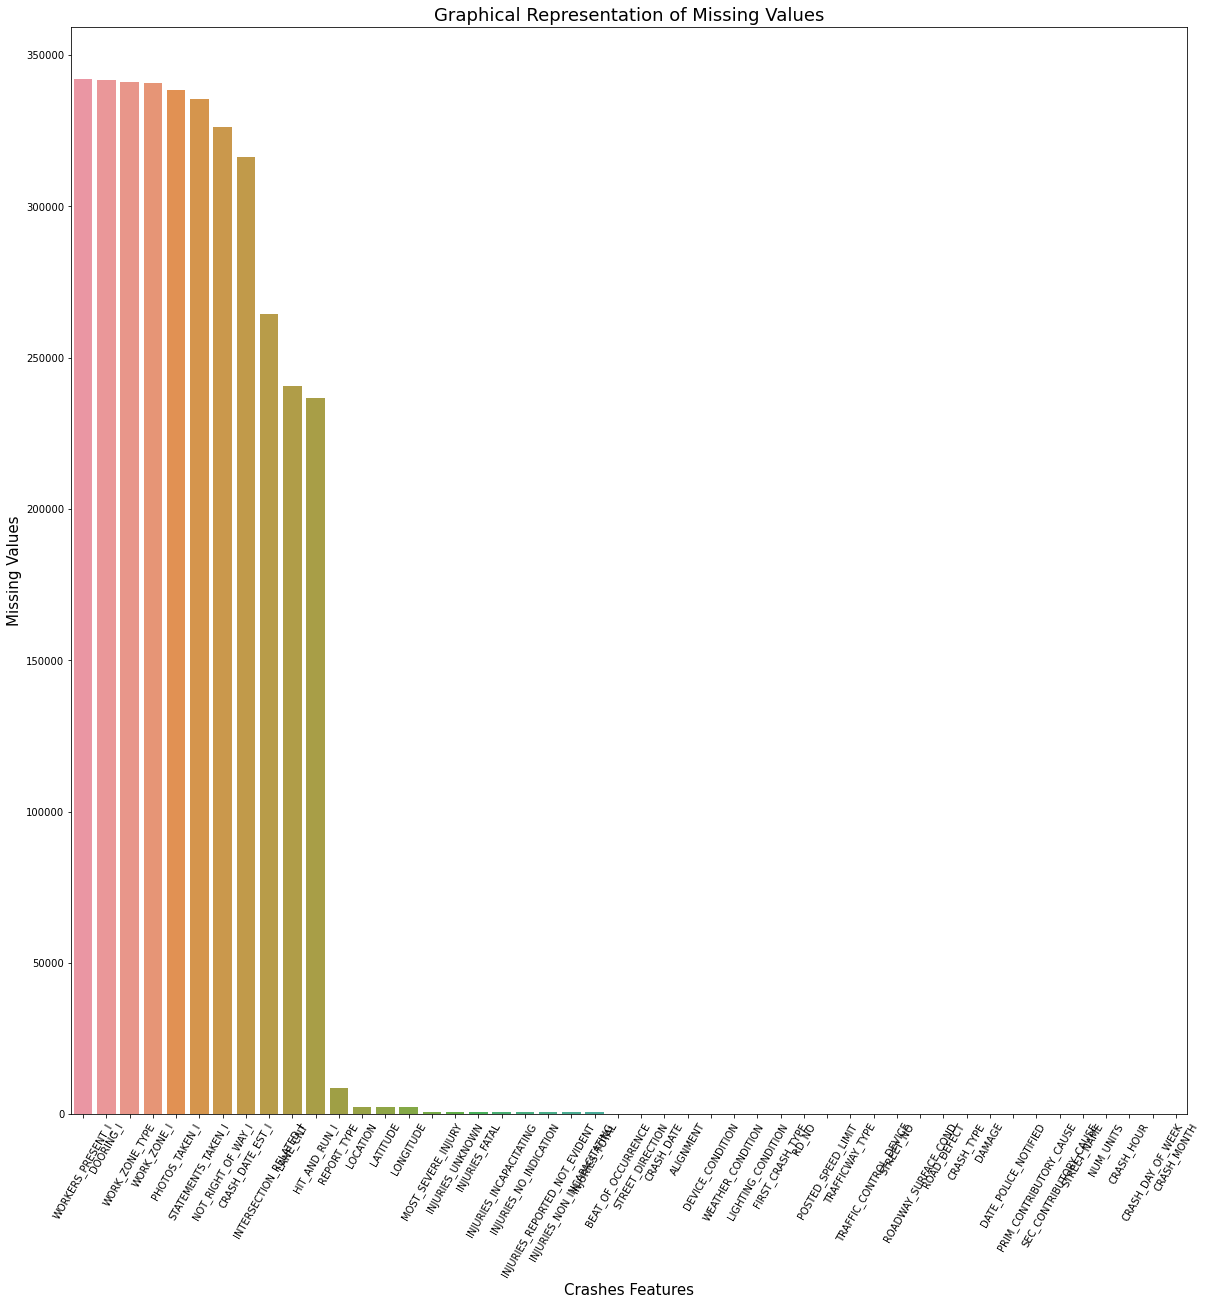

In [23]:
# graphical representation
fig, axes = plt.subplots(figsize = (20, 20))

# plot a bargraph
sns.barplot(x = missing_data.index , y = missing_data["Missing Values"])
# labeling the axes 
plt.xlabel("Crashes Features", fontsize = 15)
# rotating our xticks 
plt.xticks(rotation = '60')
# labeling the y axis 
plt.ylabel("Missing Values", fontsize = 15)
# title 
plt.title("Graphical Representation of Missing Values", fontsize = 18)
# display
plt.show()

# save the plot 
fig.savefig("miss.png")

In [24]:
# dropping columns with more than 70% missing values
def dropna_columns(df, threshold=.7):
    '''
    Drop columns from a Pandas DataFrame in which more than a certain
    percentage (default=70%) of their rows are null/NaN.
    '''
    return df.dropna(thresh=(((1-threshold) * df.shape[0])) + 1, axis=1)

In [25]:
crashes_new = dropna_columns(crashes_df)
crashes_new

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536.0,W,RANDOLPH ST,121.0,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,09/05/2018 08:40:00 AM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",09/05/2018 09:00:00 AM,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,4821.0,N,ELSTON AVE,1712.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,4.0,9.0,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,07/15/2022 12:45:00 AM,30.0,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",07/15/2022 12:50:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,300.0,N,CENTRAL PARK AVE,1123.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,7.0,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,08/29/2022 11:30:00 AM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,"$501 - $1,500",09/01/2022 11:30:00 AM,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,3939.0,W,79TH ST,834.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11.0,2.0,8.0,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,07/15/2022 06:50:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",07/20/2022 11:00:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2359.0,N,ASHLAND AVE,1811.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18.0,6.0,7.0,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342707,686c1c626f209c35a147bcc8cf41bc7e1f17eb7fc1e03c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342708,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342709,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342710,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


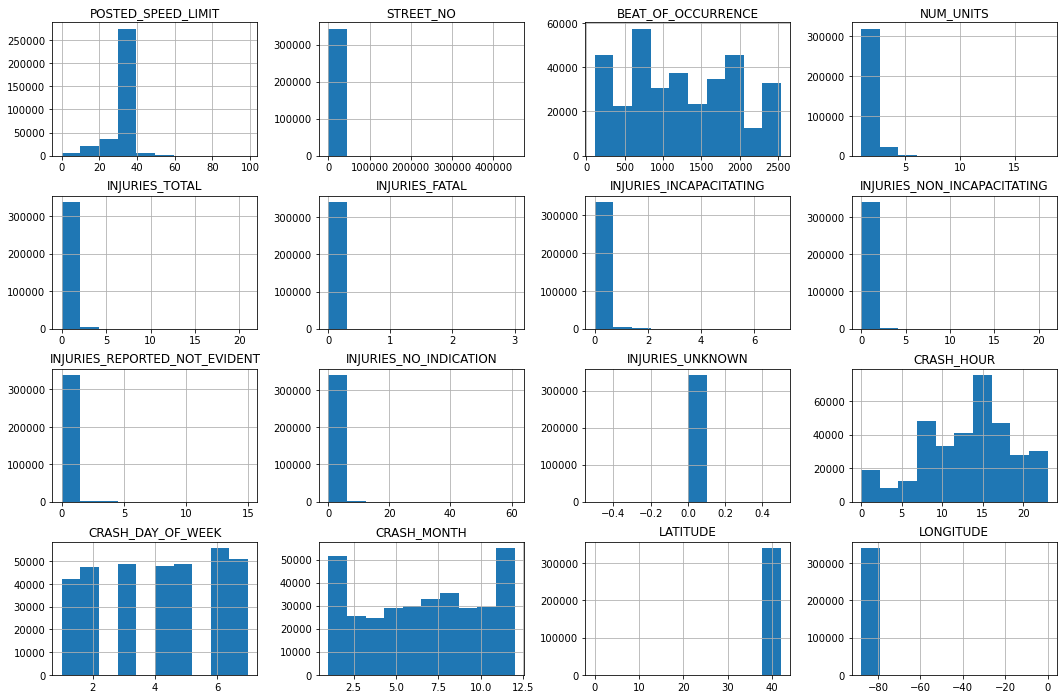

In [26]:
# Ill look at the distribution of the data as well
crashes_new.hist(figsize=(18, 12));

#### I will try and get the values of injuries  using value counts, because the injuries will tell us the impact of the accident, we shall also look at the damages cost from accidents using value_conts and using barplots to get the impact of the accident as well

In [27]:
crashes_new.INJURIES_UNKNOWN.value_counts()

0.0    341961
Name: INJURIES_UNKNOWN, dtype: int64

In [28]:
crashes_new.INJURIES_INCAPACITATING.value_counts()

0.0    336070
1.0      5186
2.0       543
3.0       113
4.0        36
5.0         9
6.0         3
7.0         1
Name: INJURIES_INCAPACITATING, dtype: int64

In [29]:
crashes_new.INJURIES_TOTAL.value_counts()

0.0     295792
1.0      34790
2.0       7688
3.0       2381
4.0        809
5.0        298
6.0        115
7.0         43
8.0         22
9.0          9
10.0         4
15.0         3
11.0         2
21.0         2
19.0         1
12.0         1
13.0         1
Name: INJURIES_TOTAL, dtype: int64

In [30]:
crashes_new.INJURIES_FATAL.value_counts()

0.0    341571
1.0       364
2.0        24
3.0         2
Name: INJURIES_FATAL, dtype: int64

In [31]:
crashes_new.CRASH_TYPE.value_counts()

NO INJURY / DRIVE AWAY              252862
INJURY AND / OR TOW DUE TO CRASH     89845
Name: CRASH_TYPE, dtype: int64

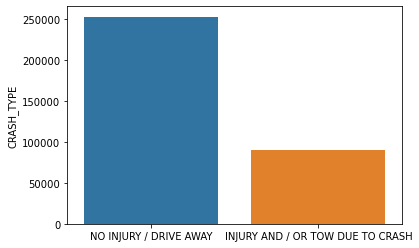

In [32]:
sns.barplot(x=crashes_new.CRASH_TYPE.value_counts().index, y=crashes_new.CRASH_TYPE.value_counts());

In [33]:
crashes_new.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY     295785
NONINCAPACITATING INJURY     26016
REPORTED, NOT EVIDENT        13929
INCAPACITATING INJURY         5834
FATAL                          390
Name: MOST_SEVERE_INJURY, dtype: int64

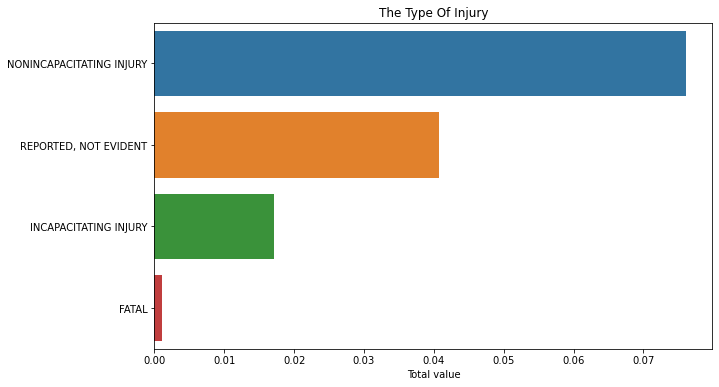

In [34]:
# dropping "no indication of injury because we need to see the effect of accident in terms on injuries"
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=crashes_new.MOST_SEVERE_INJURY.value_counts(normalize=True).drop('NO INDICATION OF INJURY').index, 
            x=crashes_new.MOST_SEVERE_INJURY.value_counts(normalize=True).drop('NO INDICATION OF INJURY'),
           orient='h', ax=ax)
plt.title('The Type Of Injury')
plt.xlabel('Total value');

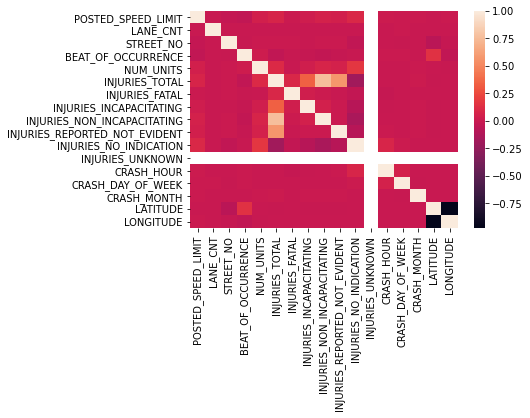

In [35]:
# check for the factors that might correlate with severity of the injuries
sns.heatmap(crashes_df.corr());

no feature correlates with severe injuries

In [36]:
crashes_new.DAMAGE.value_counts()

OVER $1,500      206278
$501 - $1,500     95774
$500 OR LESS      40655
Name: DAMAGE, dtype: int64

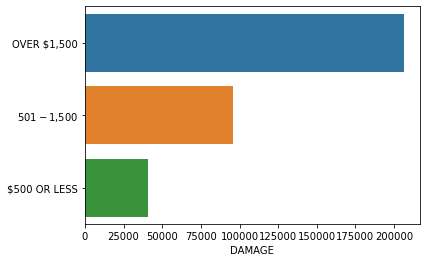

In [37]:
sns.barplot(y=crashes_new.DAMAGE.value_counts().index, x=crashes_new.DAMAGE.value_counts(),
           orient='h');

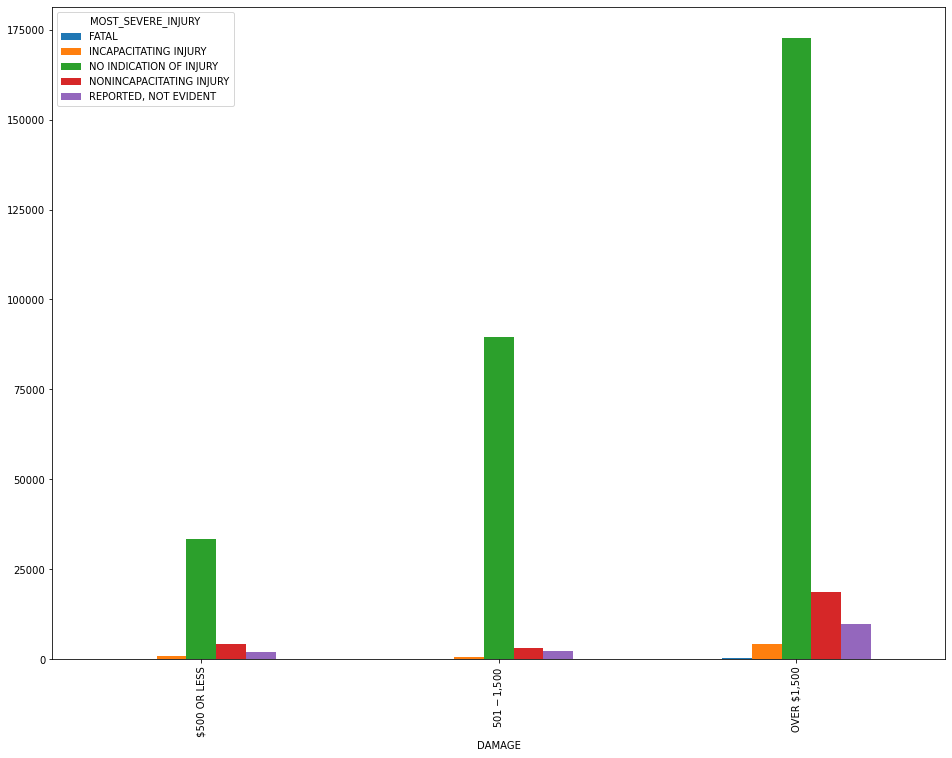

In [38]:
pd.crosstab(crashes_new.DAMAGE, crashes_new.MOST_SEVERE_INJURY).plot.bar(figsize=(16, 12));

looks like most of the damages incurred is over $1,500 and the most type of injury reported is non incapacitated

In [39]:
crashes_new.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

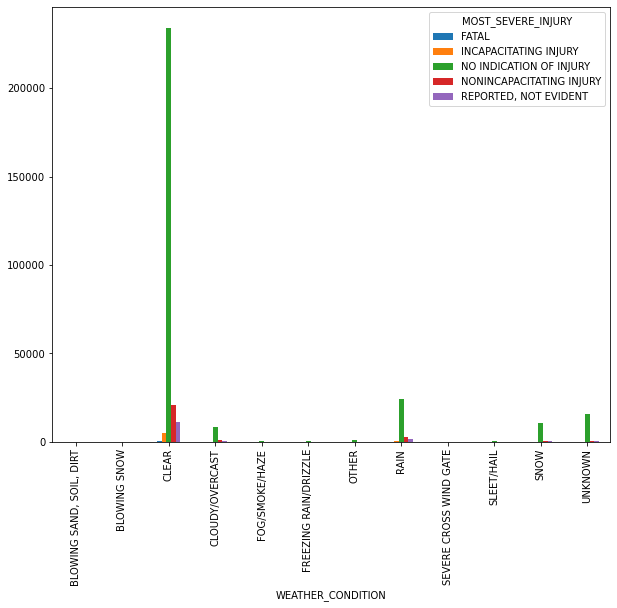

In [40]:
pd.crosstab(crashes_new.WEATHER_CONDITION, crashes_new.MOST_SEVERE_INJURY).plot.bar(figsize=(10, 8));

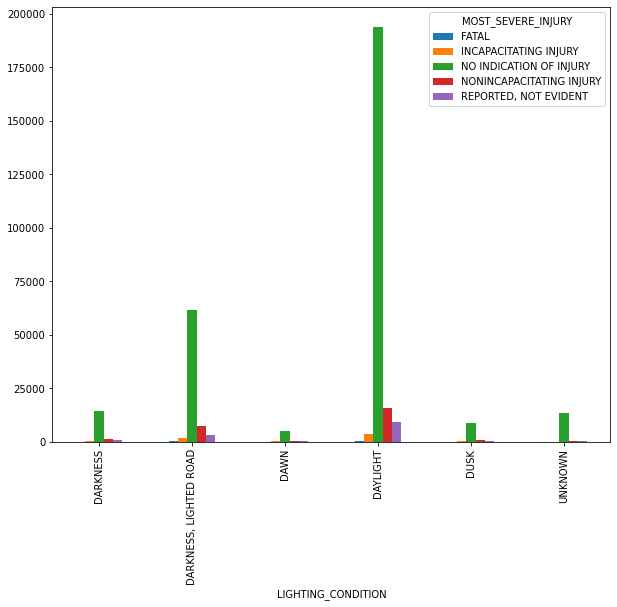

In [41]:
pd.crosstab(crashes_new.LIGHTING_CONDITION, crashes_new.MOST_SEVERE_INJURY).plot.bar(figsize=(10, 8));

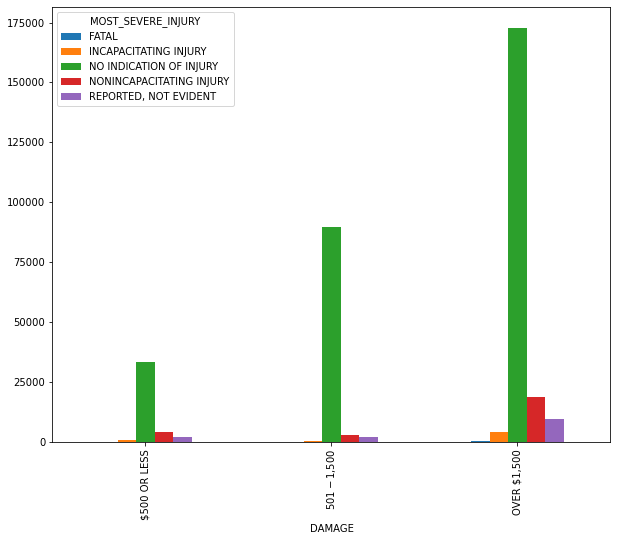

In [42]:
pd.crosstab(crashes_new.DAMAGE, crashes_new.MOST_SEVERE_INJURY).plot.bar(figsize=(10, 8));

In [43]:
#dropping irrelevnt columns to be left with a few predictors
crashes_df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,342707.000000,1.021460e+05,342707.000000,342704.000000,342707.000000,341961.000000,341961.000000,341961.000000,341961.000000,341961.000000,341961.000000,341961.0,342707.000000,342707.000000,342707.000000,340473.000000,340473.000000
mean,28.348114,1.846900e+01,3679.921437,1239.149473,2.034105,0.185624,0.001222,0.019958,0.104804,0.059638,2.004919,0.0,13.220786,4.127135,6.653188,41.854122,-87.672578
std,6.289638,3.967631e+03,2948.740813,705.273809,0.451086,0.558956,0.037368,0.163995,0.417525,0.314716,1.158954,0.0,5.554858,1.982864,3.358240,0.354613,0.723019
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1232.000000,713.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781020,-87.721374
50%,30.000000,2.000000e+00,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874533,-87.673683
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.924031,-87.633012
max,99.000000,1.191625e+06,451100.000000,2535.000000,18.000000,21.000000,3.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [44]:
crashes_new = crashes_df.drop(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 
                               'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',
                                'STATEMENTS_TAKEN_I', 'INJURIES_UNKNOWN'], axis=1)

In [45]:
crashes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342712 entries, 0 to 342711
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                342712 non-null  object 
 1   POSTED_SPEED_LIMIT             342707 non-null  float64
 2   TRAFFIC_CONTROL_DEVICE         342707 non-null  object 
 3   DEVICE_CONDITION               342707 non-null  object 
 4   WEATHER_CONDITION              342707 non-null  object 
 5   LIGHTING_CONDITION             342707 non-null  object 
 6   FIRST_CRASH_TYPE               342707 non-null  object 
 7   TRAFFICWAY_TYPE                342707 non-null  object 
 8   LANE_CNT                       102146 non-null  float64
 9   ALIGNMENT                      342707 non-null  object 
 10  ROADWAY_SURFACE_COND           342707 non-null  object 
 11  ROAD_DEFECT                    342707 non-null  object 
 12  REPORT_TYPE                   

### I'll try and create a simple model by picking   MOST_SEVERE_INJURY as my target to have the model predict that

In [46]:
crashes_new.MOST_SEVERE_INJURY.value_counts(normalize=True).drop('NO INDICATION OF INJURY').index, 

(Index(['NONINCAPACITATING INJURY', 'REPORTED, NOT EVIDENT',
        'INCAPACITATING INJURY', 'FATAL'],
       dtype='object'),)

Target variable: 0: NONINCAPACITATING INJURY, REPORTED, NOT EVIDENT
                 1: INCAPACITATING INJURY, FATAL

In [47]:
crashes_new['TARGET']= crashes_new['MOST_SEVERE_INJURY'].map({'NONINCAPACITATING INJURY': 0,
                                                      'REPORTED, NOT EVIDENT': 0,
                                                      'INCAPACITATING INJURY': 1,
                                                      'FATAL': 1})

In [48]:
crashes_new.TARGET.fillna(0, inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
X = crashes_new.drop(['INJURIES_TOTAL', 'INJURIES_FATAL', 'MOST_SEVERE_INJURY', 'INJURIES_INCAPACITATING',
                      'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                      'TARGET', 'LATITUDE', 
                      'LONGITUDE','LOCATION'], axis=1)
y = crashes_new['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Im going to use both column transfers and pipeline  to preprocess both numerical and categorical features  and then use a dummy classifier to make predictions.

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier



In [51]:
# Select numerical and categorical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes('object').columns

# Define preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# Define column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Define dummy classifier pipeline
dummy_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])

In [52]:
from sklearn.model_selection import cross_validate
#  printing the cross-validation scores

def print_cv_scores(pipe, X, y):
    # Perform cross-validation and print results 
    
    cv_results = cross_validate(pipe, X, y, return_train_score=True)
    print("Train scores:", cv_results['train_score'])
    print("Mean train score:", cv_results['train_score'].mean())
    print("Test scores:", cv_results['test_score'])
    print("Mean test score:", cv_results['test_score'].mean())


In [53]:
from sklearn.pipeline import make_pipeline


# Define the dummy classifier and the pipeline
dummy = DummyClassifier(strategy='most_frequent')
pipe = make_pipeline(dummy)

# Call the print_cv_scores function
print_cv_scores(pipe, X_train, y_train)


Train scores: [0.98190413 0.98190413 0.98190413 0.98190899 0.98190422]
Mean train score: 0.9819051176117772
Test scores: [0.98190908 0.98190908 0.98190908 0.98188963 0.98190873]
Mean test score: 0.9819051176249406


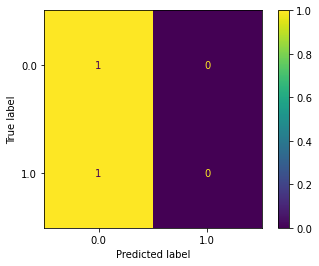

In [54]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix

# Define and fit the pipeline
dummy_pipe = make_pipeline(DummyClassifier(strategy='most_frequent'))
dummy_pipe.fit(X_train, y_train)

# Generate predicted labels
y_pred = dummy_pipe.predict(X_train)

# Plot the confusion matrix
plot_confusion_matrix(dummy_pipe, X_train, y_train, normalize='true')


##### This dummy classifier gave the same accuraccy on the train and test we are going to use another model for different results using different metrics

#### people data set checking and cleaning

In [55]:
people_df.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,3.940990e+05,89548.000000,273415.000000,506.000000
mean,8.580915e+05,4.237426,37.165752,0.165435
std,2.494754e+05,2.223764,17.290262,0.112343
min,4.100000e+01,1.000000,-177.000000,0.000000
25%,7.661980e+05,3.000000,25.000000,0.110000
50%,9.075100e+05,3.000000,34.000000,0.170000
75%,1.031274e+06,6.000000,49.000000,0.220000
max,1.366865e+06,12.000000,110.000000,1.000000


In [56]:
# then dropping the not relevant columns
people_new = people_df.drop(['PERSON_ID','CELL_PHONE_USE','RD_NO', 'HOSPITAL'], axis=1)

In [57]:
people_new.columns

Index(['PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'SEAT_NO',
       'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'EMS_AGENCY', 'EMS_RUN_NO',
       'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION',
       'BAC_RESULT', 'BAC_RESULT VALUE'],
      dtype='object')

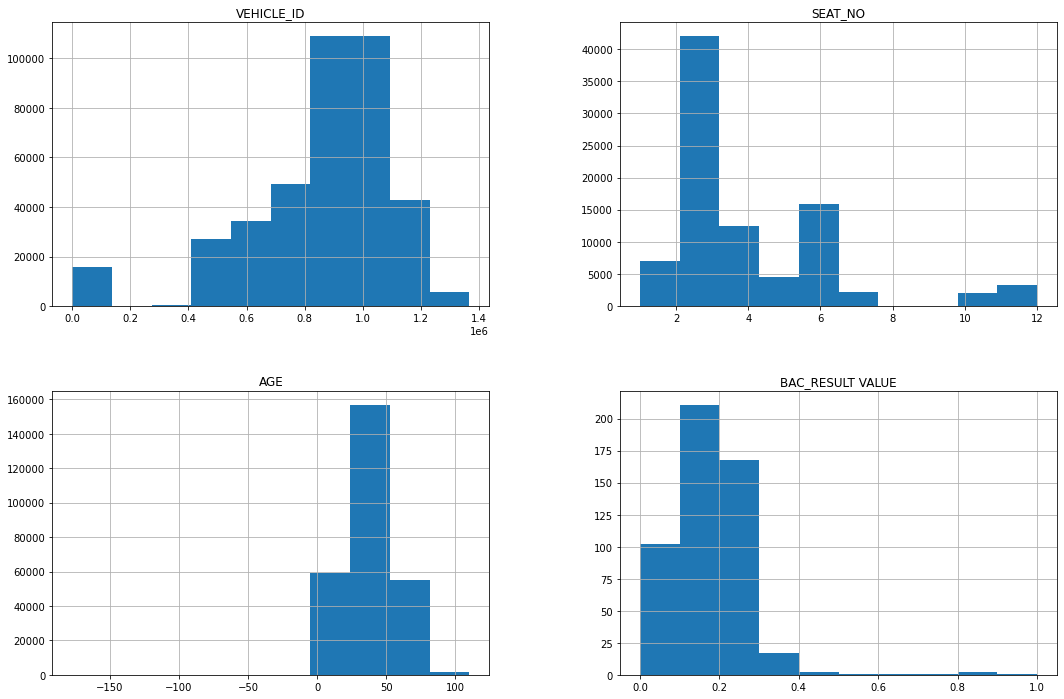

In [58]:
# checking distribution
people_new.hist(figsize=(18, 12));

We shall look at value counts for variables in people_df and how they affect accidents that lead to severe injuries and damages

In [59]:
people_new.PHYSICAL_CONDITION.value_counts()

NORMAL                          194036
UNKNOWN                         111496
IMPAIRED - ALCOHOL                1496
REMOVED BY EMS                    1215
OTHER                             1084
EMOTIONAL                          890
FATIGUED/ASLEEP                    873
ILLNESS/FAINTED                    350
HAD BEEN DRINKING                  233
IMPAIRED - DRUGS                   220
IMPAIRED - ALCOHOL AND DRUGS       160
MEDICATED                           44
Name: PHYSICAL_CONDITION, dtype: int64

In [61]:
people_new.SEX.value_counts()

M    202924
F    146480
X     46235
Name: SEX, dtype: int64

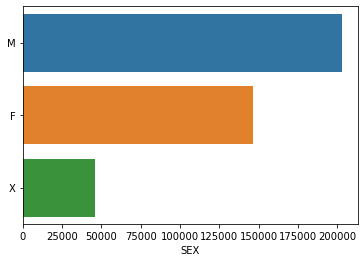

In [62]:
sns.barplot(y=people_new.SEX.value_counts().index, x=people_new.SEX.value_counts(),
           orient='h');

In [63]:
people_new.AGE.value_counts()

 25.0     8031
 26.0     7842
 27.0     7673
 28.0     7596
 29.0     7501
          ... 
 107.0       2
-1.0         2
 110.0       1
-47.0        1
-177.0       1
Name: AGE, Length: 111, dtype: int64

In [64]:
people_new['AGE_Brackets'] = pd.cut(x=people_new['AGE'], bins=[16, 19, 29, 39, 49, 59, 69, 79, 89, 99])

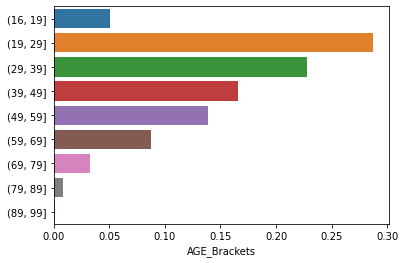

In [65]:
sns.barplot(y=people_new.AGE_Brackets.value_counts(normalize=True).index, x=people_new.AGE_Brackets.value_counts(normalize=True),
           orient='h');

In [ ]:
we have adults in the bracket (19-29) giving the most data with different injury level

In [66]:
pd.crosstab(people_new.AGE_Brackets, people_new.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
AGE_Brackets,,,,,
"(16, 19]",5,185,10934,1138,508
"(19, 29]",53,1036,62874,5717,2958
"(29, 39]",55,810,50623,4112,2109
"(39, 49]",28,514,37104,2775,1486
"(49, 59]",28,511,31005,2341,1378
"(59, 69]",23,355,19411,1568,818
"(69, 79]",14,134,7341,574,275
"(79, 89]",9,51,1907,168,80
"(89, 99]",2,6,233,24,6


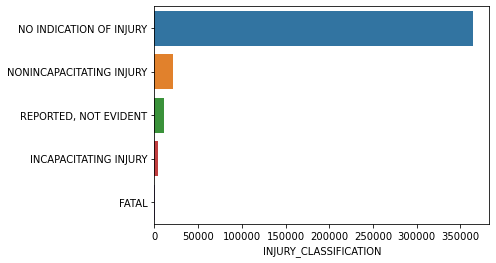

In [67]:
sns.barplot(y=people_new.INJURY_CLASSIFICATION.value_counts().index, x=people_new.INJURY_CLASSIFICATION.value_counts(),
           orient='h');

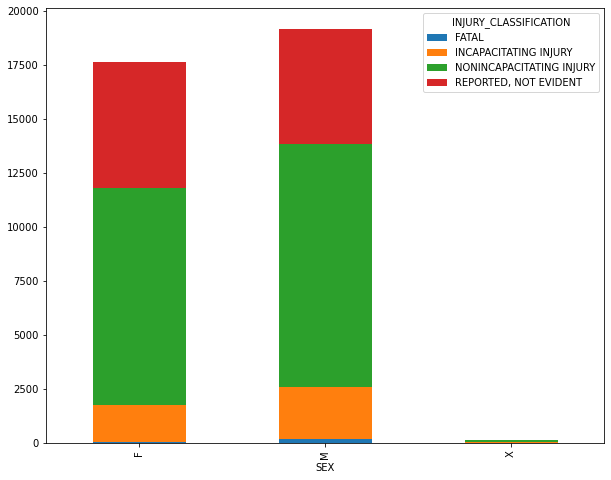

In [68]:
df = pd.crosstab(people_new.SEX, people_new.INJURY_CLASSIFICATION).drop('NO INDICATION OF INJURY', axis=1)
df.plot.bar(stacked=True, figsize=(10, 8));

#### trying to get other factors that causes differnt level of injury eg how driver actions  affect injuries

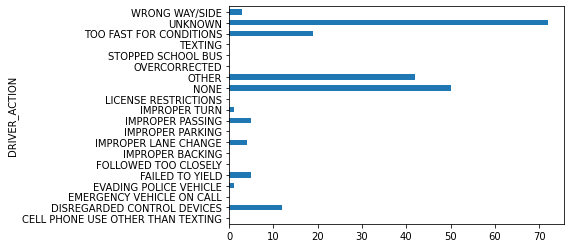

In [69]:
pd.crosstab(people_new.DRIVER_ACTION, people_new.INJURY_CLASSIFICATION)['FATAL'].plot.barh();

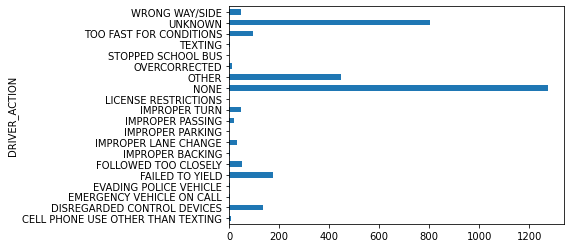

In [70]:
pd.crosstab(people_new.DRIVER_ACTION, people_new.INJURY_CLASSIFICATION)['INCAPACITATING INJURY'].plot.barh();

and we see that most driver actions causes more INCAPACITATING INJURIES than FATAL ones

In [71]:
people_new.SAFETY_EQUIPMENT.value_counts()

USAGE UNKNOWN                                 194623
SAFETY BELT USED                              182109
NONE PRESENT                                   12599
CHILD RESTRAINT USED                            2745
HELMET NOT USED                                 2444
SAFETY BELT NOT USED                            2311
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      1023
CHILD RESTRAINT - FORWARD FACING                 971
CHILD RESTRAINT - TYPE UNKNOWN                   496
CHILD RESTRAINT - REAR FACING                    480
DOT COMPLIANT MOTORCYCLE HELMET                  445
BOOSTER SEAT                                     245
CHILD RESTRAINT NOT USED                         216
NOT DOT COMPLIANT MOTORCYCLE HELMET               93
SHOULD/LAP BELT USED IMPROPERLY                   86
WHEELCHAIR                                        67
CHILD RESTRAINT USED IMPROPERLY                   40
HELMET USED                                       29
STRETCHER                                     

In [72]:
people_new.SEAT_NO.value_counts()

3.0     42059
6.0     15921
4.0     12416
5.0      4468
1.0      3622
2.0      3399
12.0     2423
7.0      2269
10.0     2077
11.0      815
8.0        79
Name: SEAT_NO, dtype: int64

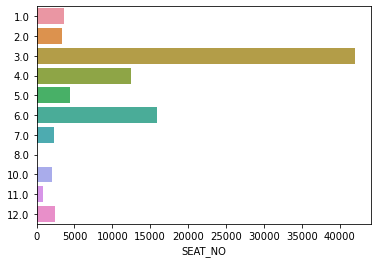

In [73]:
sns.barplot(y=people_new.SEAT_NO.value_counts().index, x=people_new.SEAT_NO.value_counts(),
           orient='h');

In [74]:
# dropping columns with more than 60% missing values
def dropna_columns(df, threshold=.6):
    '''
    Drop columns from a Pandas DataFrame in which more than a certain
    percentage (default=60%) of their rows are null/NaN.
    '''
    return df.dropna(thresh=(((1-threshold) * df.shape[0])) + 1, axis=1)

In [75]:
people_new2 = dropna_columns(people_new)
people_new2

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,AGE_Brackets
0,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED,"(19.0, 29.0]"
1,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"(29.0, 39.0]"
2,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN
3,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN
4,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402224,DRIVER,6584466b10b92aa4df58ca1cc33b26deab3de9babe6ff3...,1165276.0,11/16/2{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merging both data sets to one dataframe

we shall be trying to get a prediction on individual outcome so merging both the crashes_new, people_new2 using left join to get one dataframe where we can create a target column.

In [76]:
crashes_new.columns

Index(['CRASH_RECORD_ID', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I',
       'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'TARGET'],
      dtype='object')

In [77]:
people_new2.columns

Index(['PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'CITY',
       'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'AGE_Brackets'],
      dtype='object')

In [78]:
people_crashes_df = people_new2.merge(crashes_new, on='CRASH_RECORD_ID', how='left')

In [79]:
people_crashes_df.shape

(402229, 61)

In [80]:
people_crashes_df.columns

Index(['PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'CITY',
       'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'AGE_Brackets',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJUR

I will take the 'INJURY_CLASSIFICATION' from the peoples df to the different levels of imjuries to be predicted

In [81]:
people_crashes_df.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     364720
NONINCAPACITATING INJURY     21586
REPORTED, NOT EVIDENT        11363
INCAPACITATING INJURY         4154
FATAL                          268
Name: INJURY_CLASSIFICATION, dtype: int64

In [82]:
people_crashes_df['TARGET'] = people_crashes_df['INJURY_CLASSIFICATION'].map({np.nan: 0,
                                                      'NO INDICATION OF INJURY': 0,
                                                      'NONINCAPACITATING INJURY': 1,
                                                      'REPORTED, NOT EVIDENT': 1,
                                                      'INCAPACITATING INJURY': 2,
                                                      'FATAL': 3})

In [83]:
from sklearn.model_selection import train_test_split
X = people_crashes_df.drop(['CRASH_TYPE','INJURY_CLASSIFICATION','DRIVERS_LICENSE_STATE','LONGITUDE','LOCATION', 'TARGET'], axis=1)
y = people_crashes_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [84]:
X_train.head()

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,AGE_Brackets,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE
260711,DRIVER,b7f5eb27b362a1606bd1a2e55872d32767b15382350cb2...,990040.0,02/17/2021 04:30:00 PM,NaN,NaN,NaN,M,NaN,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51259,DRIVER,14f78aae50c989681333295ca27f7a6bba5ef203fdb337...,840345.0,05/19/2020 11:00:00 AM,CHICAGO,IL,NaN,M,43.0,D,SAFETY BELT USED,NOT APPLICABLE,NONE,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"(39.0, 49.0]",35.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLOUDY/OVERCAST,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,Y,NaN,NaN,$500 OR LESS,05/19/2020 11:02:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,1731.0,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,11.0,3.0,5.0,41.953486
276122,PASSENGER,2806be6a8d6da360c223421de340fbf4fbeef65dcf18e3...,677524.0,08/08/2019 03:30:00 PM,NaN,NaN,NaN,M,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NaN,NaN,NaN,NaN,NaN,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),N,NaN,NaN,"$501 - $1,500",08/08/2019 03:50:00 PM,FOLLOWING TOO CLOSELY,DISREGARDING TRAFFIC SIGNALS,114.0,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,15.0,5.0,8.0,41.883266
379588,DRIVER,3dd73f2975da6c9cdf9fe5ee72183fa882ffd7e3d43ea2...,1106411.0,08/21/2021 12:50:00 PM,SKOKIE,IL,60076,M,61.0,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,IMPROPER LANE CHANGE,UNKNOWN,NORMAL,TEST NOT OFFERED,"(59.0, 69.0]",30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NaN,NaN,NaN,"OVER $1,500",08/21/2021 01:30:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,1224.0,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,12.0,7.0,8.0,41.883176
280532,PASSENGER,0a9969548e11d31968a859834d4f606263ca512d59b922...,680273.0,08/12/2019 04:58:00 PM,KEYPORT,NJ,07735,M,33.0,NaN,SAFETY BELT USED,NOT APPLICABLE,NONE,NaN,NaN,NaN,NaN,"(29.0, 39.0]",30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,Y,NaN,NaN,"OVER $1,500",08/12/2019 05:00:00 PM,DISREGARDING TRAFFIC SIGNALS,FAILING TO YIELD RIGHT-OF-WAY,1912.0,NaN,NaN,NaN,NaN,NaN,2.0,NONINCAPACITATING INJURY,3.0,0.0,0.0,3.0,0.0,4.0,16.0,2.0,8.0,41.965322


### Logistic regression

In [85]:
X_train_smaller = X_train[['PERSON_TYPE', 'SEX', 'SAFETY_EQUIPMENT', 'AGE', 'AIRBAG_DEPLOYED', 
                           'EJECTION', 'DRIVER_ACTION', 'LIGHTING_CONDITION', 'WEATHER_CONDITION', 
                           'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 
                           'BEAT_OF_OCCURRENCE', 'NUM_UNITS']]

In [86]:
 X_test_true = X_test[['SEX', 'SAFETY_EQUIPMENT', 'AGE', 'AIRBAG_DEPLOYED', 
                      'EJECTION', 'DRIVER_ACTION', 'LIGHTING_CONDITION', 'WEATHER_CONDITION', 
                            'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'PERSON_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 
                            'BEAT_OF_OCCURRENCE', 'NUM_UNITS']]

In [87]:
for i in range(len(X_train.columns)):
    print(X_train[X_train.columns[i]].value_counts())
    print(X_train[X_train.columns[i]].isna().sum())
    print('--------------------')

DRIVER                 228903
PASSENGER               67107
PEDESTRIAN               3246
BICYCLE                  2074
NON-MOTOR VEHICLE         281
NON-CONTACT VEHICLE        56
Name: PERSON_TYPE, dtype: int64
4
--------------------
13026c7fb51566d9ca487a093e38c6f5621c2ec25be48c306b6574983b61daeee589524b96bb2bfe66ddd0f695c8d2bf3ab0297558528e9c7a70363c763d6bd1    39
d4787d049b96314cef6265dbb92227b34d74a770323c5af4a45b12ad70bfbfb32741de67dd2ca3c2d7966afc29f939750bbe203a77678899d45fb9c9e4e0eaaf    30
95741c5fca615c892ab34d22a08da8da4a04594d1b2b989ab96e7e43a59ce144152bd50793d5ca75a8590f6f30f5409c577a43b38ec9c8126bee83ff3c4367bf    28
61bee823dd33ba8c08b79c23806840fe0ca32f48aedc443c05b258b7d294bbef029e904d9b4b2a8eb10878d04fd6e488c018065a593216d26022c590ec70d642    27
c457d0cd0bbe5e7c9ae2008ec2cb9ecbe0541af0a15c9297a3ce05125b7bf0465d36560bd564c430a45ca549cf17c566ea16737ce87ba69d1318dc5c4814174f    26
                                                                                          

NO CONTROLS                 79915
TRAFFIC SIGNAL              50040
STOP SIGN/FLASHER           17576
UNKNOWN                      4877
OTHER                         957
YIELD                         254
OTHER REG. SIGN               190
OTHER WARNING SIGN            132
RAILROAD CROSSING GATE        115
PEDESTRIAN CROSSING SIGN      113
FLASHING CONTROL SIGNAL       102
LANE USE MARKING               81
POLICE/FLAGMAN                 68
DELINEATORS                    66
SCHOOL ZONE                    58
RR CROSSING SIGN               37
OTHER RAILROAD CROSSING        36
NO PASSING                     10
BICYCLE CROSSING SIGN           6
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64
147038
--------------------
NO CONTROLS                 81483
FUNCTIONING PROPERLY        61808
UNKNOWN                      8897
OTHER                        1194
FUNCTIONING IMPROPERLY        676
NOT FUNCTIONING               517
WORN REFLECTIVE MATERIAL       45
MISSING                        13
Name: DEVIC

Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64
147038
--------------------
1834.0    1549
114.0     1495
815.0     1480
813.0     1466
833.0     1363
          ... 
1125.0     131
2431.0     129
1653.0      65
1652.0      33
1655.0      29
Name: BEAT_OF_OCCURRENCE, Length: 274, dtype: int64
147038
--------------------
Y    1484
N     452
Name: PHOTOS_TAKEN_I, dtype: int64
299735
--------------------
Y    280
N    167
Name: DOORING_I, dtype: int64
301224
--------------------
Y    614
N    164
Name: WORK_ZONE_I, dtype: int64
300893
--------------------
CONSTRUCTION    407
UNKNOWN          89
MAINTENANCE      71
UTILITY          47
Name: WORK_ZONE_TYPE, dtype: int64
301057
--------------------
Y    200
N     21
Name: WORKERS_PRESENT_I, dtype: int64
301450
--------------------
2.0     133547
3.0      12278
1.0       5419
4.0       2437
5.0        604
6.0        237
7.0         68
8.0         32
9.0          9
10.0         1
11.0         1
Name: NUM_UNITS, dtype: int64
147038
------------------

In [88]:
def age_transformer(df):
    df['AGE'][df.AGE < 0] = np.nan
    df.loc[(df.AGE==0)&(df.PERSON_TYPE == 'DRIVER')]['AGE'] = np.nan
    df.AGE.dropna(inplace=True)
    return df

In [89]:
def to_float_transformer(df):
    '''
    Ensure all columns are float, not int.
    '''
    for col in [df.select_dtypes('int64').columns]:
        df[col] = df[col].astype('float64')
    return df

In [90]:
def fill_categories(df):
    '''
    Fill null values with given value for 
    unknown values in that column.
    Drop all remaining nulls.
    '''
    df.fillna({#'STATE':'XX', 
               # 'DRIVERS_LICENSE_STATE':'XX', # This col now dropped before train-test-split
               #'DRIVERS_LICENSE_CLASS': 'D', # Most common; D = 'normal' drivers license for cars
               'EJECTION': 'UNKNOWN',
               'DRIVER_ACTION': 'UNKNOWN',
               #'DRIVER_VISION': 'UNKNOWN',
               #'PHYSICAL_CONDITION': 'UNKNOWN',
               'SAFETY_EQUIPMENT': 'USAGE_UNKNOWN',
               'AIRBAG_DEPLOYED': 'DEPLOYMENT_UNKNOWN',
               'SEX': 'UNKNOWN',
               #'INTERSECTION_RELATED_I': 'N',
               #'HIT_AND_RUN_I': 'N',
               #'BAC_RESULT': 'TEST NOT OFFERED'
              }, inplace=True)
    return df

In [91]:
def beat_transformer(df):
    '''
    Extract and encode as a string the district
    from BEAT_OF_OCCURRENCE.
    '''
    df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].apply(str)
    df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].apply(lambda x: x[:-4])
    return df

In [92]:
def license_class_transformer(df):
    '''
    Bin all license classes into A, B, C, D, and OTHER
    '''
    dl_classes = ['A', 'B', 'C', 'D', np.nan]
    df.loc[df['DRIVERS_LICENSE_CLASS'].isin(dl_classes) == False, 'DRIVERS_LICENSE_CLASS'] = 'OTHER'
    return df

In [93]:
def fill_categories_smaller(df):
    '''
    Fill null values with given value for 
    unknown values in that column.
    Drop all remaining nulls.
    '''
    df.fillna({'EJECTION': 'UNKNOWN',
               'DRIVER_ACTION': 'UNKNOWN',
               'SAFETY_EQUIPMENT': 'USAGE_UNKNOWN',
               'AIRBAG_DEPLOYED': 'DEPLOYMENT_UNKNOWN',
               'SEX': 'UNKNOWN',
              }, inplace=True)
    df.dropna()
    return df

In [94]:
def seat_no_transformer(df):
    '''
    Set all SEAT_NO = 1 if PERSON_TYPE = 'DRIVER'
    and fill the rest with 0.
    '''
    df.loc[(df.PERSON_TYPE == 'DRIVER'), 'SEAT_NO'] = 1
    df['SEAT_NO'].fillna(value=0, inplace=True)
    return df

In [97]:
ohe_cols = list(X_train.select_dtypes('object').columns)
ohe_cols.append('BEAT_OF_OCCURRENCE')

# OneHotEncode the columns as part of cleaning
# to avoid needing to separate numerical and categorical
# columns later
ohe_col_trans = ColumnTransformer(transformers=
                                  [('ohe', OneHotEncoder(drop='first', sparse=False), ohe_cols)],
                                 remainder='passthrough')

# Apply all our cleaning functions, then finish with ohe
cleaning_pipeline = Pipeline(steps=[
    ('seat_no', FunctionTransformer(seat_no_transformer)),
    ('beat', FunctionTransformer(beat_transformer)),
    ('license', FunctionTransformer(license_class_transformer)),
    ('fill_cat', FunctionTransformer(fill_categories)),
    ('float', FunctionTransformer(to_float_transformer)),
    ('col_trains', ohe_col_trans)
])

In [101]:
def fill_categories(df):
    X.fillna(X.median(), inplace=True)
    return X


In [103]:
cleaning_pipeline = Pipeline(steps=[
    ('remove_na', FunctionTransformer(lambda X: X.dropna())),
    ('seat_no', FunctionTransformer(seat_no_transformer)),
    ('beat', FunctionTransformer(beat_transformer)),
    ('license', FunctionTransformer(license_class_transformer)),
    ('fill_cat', FunctionTransformer(fill_categories)),
    ('float', FunctionTransformer(to_float_transformer)),
    ('col_trains', ohe_col_trans)
])


In [107]:
X_train = X_train.dropna(how='all', axis=1)


In [109]:
missing_values_pct = X_train.isna().mean()
columns_to_drop = missing_values_pct[missing_values_pct > 0.5].index
X_train = X_train.drop(columns_to_drop, axis=1)


In [111]:
missing_values_pct = X_train.isna().mean(axis=1)
rows_to_drop = missing_values_pct[missing_values_pct > 0.5].index
X_train = X_train.drop(rows_to_drop)


In [113]:
X_train.head()

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,AGE_Brackets,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,SEAT_NO
51259,DRIVER,14f78aae50c989681333295ca27f7a6bba5ef203fdb337...,840345.0,05/19/2020 11:00:00 AM,CHICAGO,IL,NaN,M,43.0,SAFETY BELT USED,NOT APPLICABLE,NONE,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"(39.0, 49.0]",35.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLOUDY/OVERCAST,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,$500 OR LESS,05/19/2020 11:02:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,11.0,3.0,5.0,41.953486,1.0
276122,PASSENGER,2806be6a8d6da360c223421de340fbf4fbeef65dcf18e3...,677524.0,08/08/2019 03:30:00 PM,NaN,NaN,NaN,M,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,NaN,NaN,NaN,NaN,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"$501 - $1,500",08/08/2019 03:50:00 PM,FOLLOWING TOO CLOSELY,DISREGARDING TRAFFIC SIGNALS,,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,15.0,5.0,8.0,41.883266,0.0
379588,DRIVER,3dd73f2975da6c9cdf9fe5ee72183fa882ffd7e3d43ea2...,1106411.0,08/21/2021 12:50:00 PM,SKOKIE,IL,60076,M,61.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,IMPROPER LANE CHANGE,UNKNOWN,NORMAL,TEST NOT OFFERED,"(59.0, 69.0]",30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",08/21/2021 01:30:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,12.0,7.0,8.0,41.883176,1.0
280532,PASSENGER,0a9969548e11d31968a859834d4f606263ca512d59b922...,680273.0,08/12/2019 04:58:00 PM,KEYPORT,NJ,07735,M,33.0,SAFETY BELT USED,NOT APPLICABLE,NONE,UNKNOWN,NaN,NaN,NaN,"(29.0, 39.0]",30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,"OVER $1,500",08/12/2019 05:00:00 PM,DISREGARDING TRAFFIC SIGNALS,FAILING TO YIELD RIGHT-OF-WAY,,2.0,NONINCAPACITATING INJURY,3.0,0.0,0.0,3.0,0.0,4.0,16.0,2.0,8.0,41.965322,0.0
70376,DRIVER,45c69c1b8419a0be258fe86517129a5f6ea72c731efae8...,910257.0,09/18/2020 01:39:00 PM,CHICAGO,IL,60608,F,36.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"(29.0, 39.0]",30.0,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",09/18/2020 03:10:00 PM,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13.0,6.0,9.0,41.758395,1.0


In [135]:
X_train.columns

Index(['PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'CITY',
       'STATE', 'ZIPCODE', 'SEX', 'AGE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'BAC_RESULT', 'AGE_Brackets', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE'],
      dtype='object')

In [115]:
# Set a threshold for the percentage of missing values in a column
missing_threshold = 0.5

# Drop columns with a high number of missing values
X_train = X_train.dropna(thresh=len(X_train)*missing_threshold, axis=1)


In [116]:
# Set a threshold for the variance of a column
variance_threshold = 0.01

# Drop columns with low variance
variances = X_train.var()
low_variance_cols = variances[variances < variance_threshold].index
X_train = X_train.drop(low_variance_cols, axis=1)


In [124]:
def to_float_transformer(X):
    num_cols = X.select_dtypes(include=np.number).columns
    X[num_cols] = X[num_cols].apply(pd.to_numeric, errors='coerce')
    X[num_cols] = X[num_cols].astype(float)
    return X


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer),
        ('cat', categorical_transformer, categorical_features)])
# define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])

cleaning_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [130]:
# Define the numerical and categorical column names
num_cols = list(X_train.select_dtypes(include=np.number).columns)
cat_cols = list(X_train.select_dtypes('object').columns)
cat_cols.append('BEAT_OF_OCCURRENCE')

# Define the column transformers for numerical and categorical columns separately
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('to_float', FunctionTransformer(lambda x: x.astype('float64'), validate=False))
])

In [131]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', sparse=False))
])

In [132]:
# Define the column transformer that applies the separate transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [141]:
# Define the cleaning pipeline
cleaning_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using a generator to load data in batches
batch_size = 32
num_steps_per_epoch = 1000
model.fit_generator(data_generator(batch_size), steps_per_epoch=num_steps_per_epoch)


ImportError: Traceback (most recent call last):
  File "C:\Users\mutho\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [144]:
import numpy as np
from scipy.sparse import csr_matrix

# Create a dense array of zeros
dense_array = np.zeros((71522, 154910), dtype=np.float64)

# Convert the dense array to a sparse matrix
sparse_matrix = csr_matrix(dense_array)

# Use the sparse matrix in place of the dense array
# For example, you could pass the sparse matrix to a function that expects an array:
my_function(sparse_matrix)


MemoryError: Unable to allocate 82.5 GiB for an array with shape (71522, 154910) and data type float64

In [142]:
# Fit and transform the training data
X_train_new = cleaning_pipeline.fit_transform(X_train)

MemoryError: Unable to allocate 82.5 GiB for an array with shape (71522, 154910) and data type float64

In [ ]:
X_train.head()

In [ ]:


X_train_true = pd.DataFrame({'AGE': [], 'DAMAGE': [], 'SEX': [], 'LIGHTING_CONDITION': [], 'PERSON_TYPE': [], 'WEATHER_CONDITION': [], 'SAFETY_EQUIPMENT': []})

X_test_true = pd.DataFrame({'SEX': [], 'SAFETY_EQUIPMENT': [], 'AGE': [], 'AIRBAG_DEPLOYED': [], 'EJECTION': [], 'DRIVER_ACTION': [], 'LIGHTING_CONDITION': [], 'WEATHER_CONDITION': [], 'FIRST_CRASH_TYPE': [], 'TRAFFICWAY_TYPE': [], 'PERSON_TYPE': [], 'DAMAGE': [], 'PRIM_CONTRIBUTORY_CAUSE': [], 'BEAT_OF_OCCURRENCE': [], 'NUM_UNITS': []})


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[        ('num', numeric_transformer, numerical_features),        ('cat', categorical_transformer, categorical_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),                      ('classifier', RandomForestClassifier())])


In [ ]:
# Define the transformers for the numerical and categorical features
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Define the preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['numerical_feature_1', 'numerical_feature_2']),
        ('cat', OneHotEncoder(), ['categorical_feature'])
    ])

cleaning_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


# Logistic regression

In [136]:
from sklearn.linear_model import LogisticRegression

lr_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced'))
])


In [137]:
def print_cv_scores(pipe, X, y):
    
    # we pass in pipe to cross validate along with a feature list.
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True)
    
    print(results['train_score'])
    print(results['train_score'].mean())
    print('##############')
    print(results['test_score'])
    print(results['test_score'].mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier(max_depth = 4,
                                  n_estimators = 50,
                                  random_state = 42))
])

In [ ]:
print_cv_scores(rf_pipe, X_res, y_res)